## 와인 분류 

In [1]:
import pandas as pd

red_url = "https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-red.csv"
white_url = "https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-white.csv"

red_wine = pd.read_csv(red_url, sep=';')
white_wine = pd.read_csv(white_url, sep=';') ## ;을 기준으로 분류해서 읽어라


In [2]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
white_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

### 두 데이터 합치기

In [5]:
red_wine['color'] = 1.
white_wine['color'] = 0.

wine = pd.concat([red_wine, white_wine])
wine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 710.6 KB


In [6]:
wine['quality'].unique()

array([5, 6, 7, 4, 8, 3, 9])

### 히스토그램

In [7]:
import plotly.express as px

fig = px.histogram(wine, x='quality')
fig.show()

In [8]:
fig = px.histogram(wine, x='quality', color='color')
fig

### 분류기

In [9]:
x = wine.drop(['color'], axis=1)
y = wine['color']

In [10]:
from sklearn.model_selection import train_test_split
import numpy as np

train_data, test_data, train_label, test_label = train_test_split(x, y, test_size=0.2,
                                                                  random_state=13)
np.unique(train_label, return_counts=True)

(array([0., 1.]), array([3913, 1284]))

### 히스토그램으로 확인

In [15]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(x=train_data['quality'], name = 'Train'))
fig.add_trace(go.Histogram(x=test_data['quality'], name = 'Test'))

fig.update_layout(barmode='overlay')  ## 겹처서 그려주는 것
fig.update_traces(opacity=0.75)  ## 투명도
fig.show()

### 학습

In [16]:
from sklearn.tree import DecisionTreeClassifier

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(train_data, train_label)

DecisionTreeClassifier(max_depth=2, random_state=13)

In [17]:
from sklearn.metrics import accuracy_score

pred_train = wine_tree.predict(train_data)
pred_test = wine_tree.predict(test_data)

print( "train acc : ", accuracy_score(train_label, pred_train))
print( "train acc : ", accuracy_score(test_label, pred_test))

train acc :  0.9553588608812776
train acc :  0.9569230769230769


### 데이터 전처리
- 컬럼들의 최대 최소 범위가 각각 다르고 평균과 분산이 각각 다르다
- 특성의 편향 문제는 최적의 모델을 찾는데 방해가 될 수 있다
- 이럴 때 - MinMAxScaler, StandardScaler

In [18]:
fig = go.Figure()

fig.add_trace(go.Box(y=x['fixed acidity'], name='fixed acidity'))
fig.add_trace(go.Box(y=x['chlorides'], name='chlorides'))
fig.add_trace(go.Box(y=x['quality'], name='quality'))

fig.show()

- 결정 나무에서는 이런 전처리는 의미를 가지지 않는다.
- 주로 cost function을 최적화 할 때 유효할 때가 있다
- MinMaxScaler, StandardScaler중 어떤 것이 좋은지는 해봐야 안다

In [19]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

MMS = MinMaxScaler()
SS = StandardScaler()

SS.fit(x)
MMS.fit(x)

x_ss = SS.transform(x)
x_mms = MMS.transform(x)

In [22]:
x_ss_pd = pd.DataFrame(x_ss, columns=x.columns)
x_mms_pd = pd.DataFrame(x_mms, columns=x.columns)

### MinmaxScaler

- 최대 최솟값을 1과 0사이로 맞추는 것

In [23]:
fig = go.Figure()
fig.add_trace(go.Box(y=x_mms_pd['fixed acidity'], name='fixed acidity'))
fig.add_trace(go.Box(y=x_mms_pd['chlorides'], name='chlorides'))
fig.add_trace(go.Box(y=x_mms_pd['quality'], name='quality'))

fig.show()

### StandardScaler
- 평균을 0, 표준편차를 1로 맞추는 것 >> 정규분포화

In [24]:
fig = go.Figure()

fig.add_trace(go.Box(y=x_ss_pd['fixed acidity'], name='fixed acidity'))
fig.add_trace(go.Box(y=x_ss_pd['chlorides'], name='chlorides'))
fig.add_trace(go.Box(y=x_ss_pd['quality'], name='quality'))

fig.show()

### mms를 이용해서 다시 학습
- 결정 나무에서는 이러한 전처리는 거의 효과가 없다

In [27]:
train_data, test_data, train_label, test_label = train_test_split(x_mms_pd, y, 
                                                                  test_size=0.2,
                                                                  random_state=13)

wine_tree =DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(train_data, train_label)

pred_train = wine_tree.predict(train_data)
pred_test = wine_tree.predict(test_data)

print("train acc : ", accuracy_score(train_label, pred_train))
print("test acc : ", accuracy_score(test_label, pred_test))

train acc :  0.9553588608812776
test acc :  0.9569230769230769


### ss를 이용해서 다시 학습
- 이것도 의미가 없다
- max_depth를 높이면 정확도는 증가함

In [37]:
train_data, test_data, train_label, test_label = train_test_split(x_ss_pd, y, test_size=0.2,
                                                                  random_state=13)

wine_tree = DecisionTreeClassifier(max_depth=3, random_state=13)
wine_tree.fit(train_data, train_label)

pred_train = wine_tree.predict(train_data)
pred_test = wine_tree.predict(test_data)

print("train acc : ", accuracy_score(train_label, pred_train))
print("test acc : ", accuracy_score(test_label, pred_test))

train acc :  0.9751779873003656
test acc :  0.9707692307692307


### 결정나무 시각화

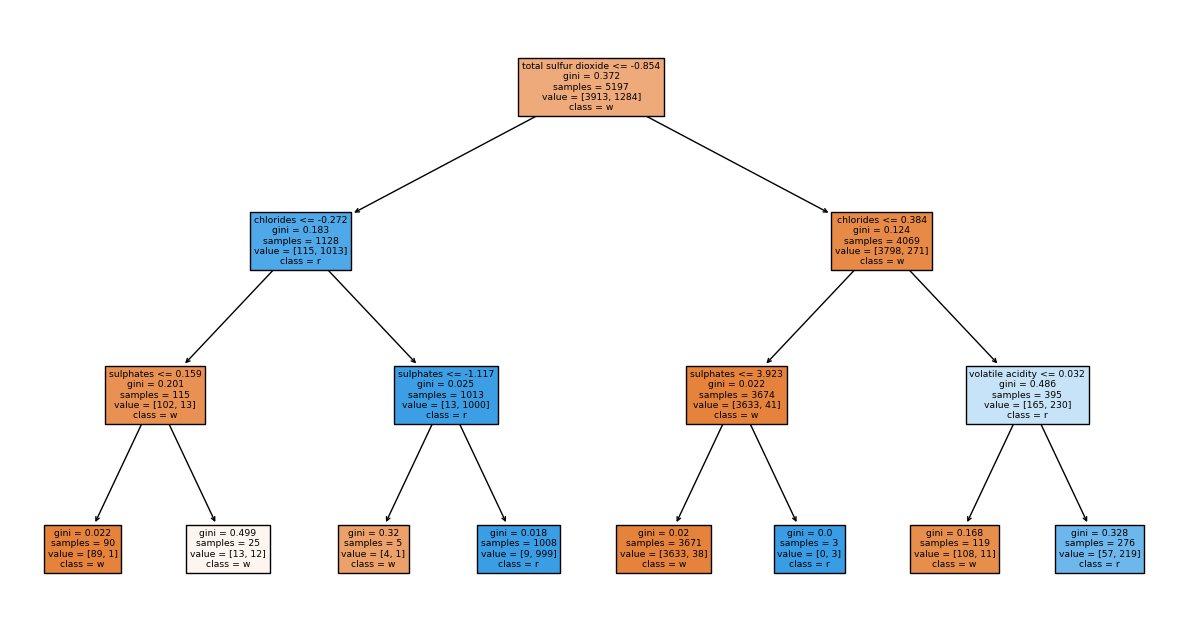

In [38]:
import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(15, 8))
_= tree.plot_tree(wine_tree,
                  feature_names=list(train_data.columns),
                  class_names=["w", "r"],
                  filled=True)

In [39]:
dict(zip(train_data.columns, wine_tree.feature_importances_))

{'fixed acidity': 0.0,
 'volatile acidity': 0.0476831294147755,
 'citric acid': 0.0,
 'residual sugar': 0.0,
 'chlorides': 0.2278232609684235,
 'free sulfur dioxide': 0.0,
 'total sulfur dioxide': 0.712415579066555,
 'density': 0.0,
 'pH': 0.0,
 'sulphates': 0.012078030550246017,
 'alcohol': 0.0,
 'quality': 0.0}

### 와인 맛에 대한 분류

In [40]:
wine['taste'] = [1. if grade>5 else 0 for grade in wine['quality']]
wine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   float64
 13  taste                 6497 non-null   float64
dtypes: float64(13), int64(1)
memory usage: 761.4 KB


In [51]:
x = wine.drop('taste', axis=1)
y = wine["taste"]

train_data, test_data, train_label, test_label = train_test_split(x, y,
                                                                  test_size=0.2,
                                                                  random_state=13)

wine_tree = DecisionTreeClassifier(max_depth=3, random_state=13)
wine_tree.fit(train_data, train_label)

DecisionTreeClassifier(max_depth=3, random_state=13)

In [52]:
pred_train = wine_tree.predict(train_data)
pred_test = wine_tree.predict(test_data)

print( "train acc : ", accuracy_score(train_label, pred_train))
print(" test acc : ", accuracy_score(test_label, pred_test))

train acc :  1.0
 test acc :  1.0


### quality 컬럼을 기반으로 taste를 만들었기 때문에 이런결과가 발생함

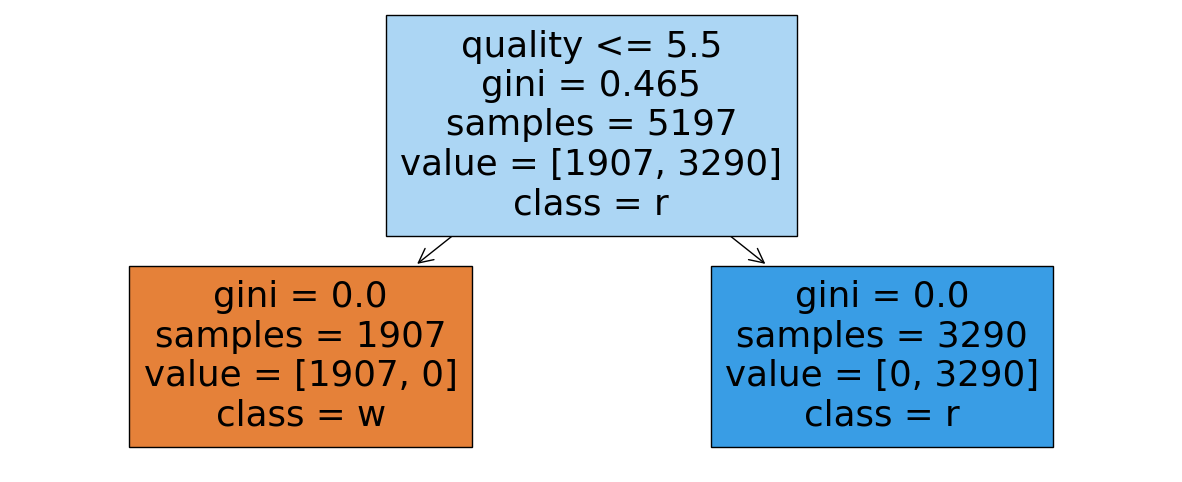

In [53]:
fig = plt.figure(figsize=(15, 6))
_ = tree.plot_tree(wine_tree,
                   feature_names=list(train_data.columns),
                   class_names=["w", 'r'],
                   filled=True)

### 지우고 다시

In [72]:
x = wine.drop(['taste', 'quality'], axis=1)
y = wine['taste']

train_data, test_data, train_label, test_label = train_test_split(x, y,
                                                                 test_size=0.2,
                                                                 random_state=13)

wine_tree = DecisionTreeClassifier(max_depth=4, random_state=13)
wine_tree.fit(train_data, train_label)

DecisionTreeClassifier(max_depth=4, random_state=13)

In [74]:
pred_train = wine_tree.predict(train_data)
pred_test = wine_tree.predict(test_data)

print("trian acc : ", accuracy_score(train_label, pred_train))
print("test acc : ", accuracy_score(test_label, pred_test))

 trian acc :  0.7523571291129498
test acc :  0.7323076923076923


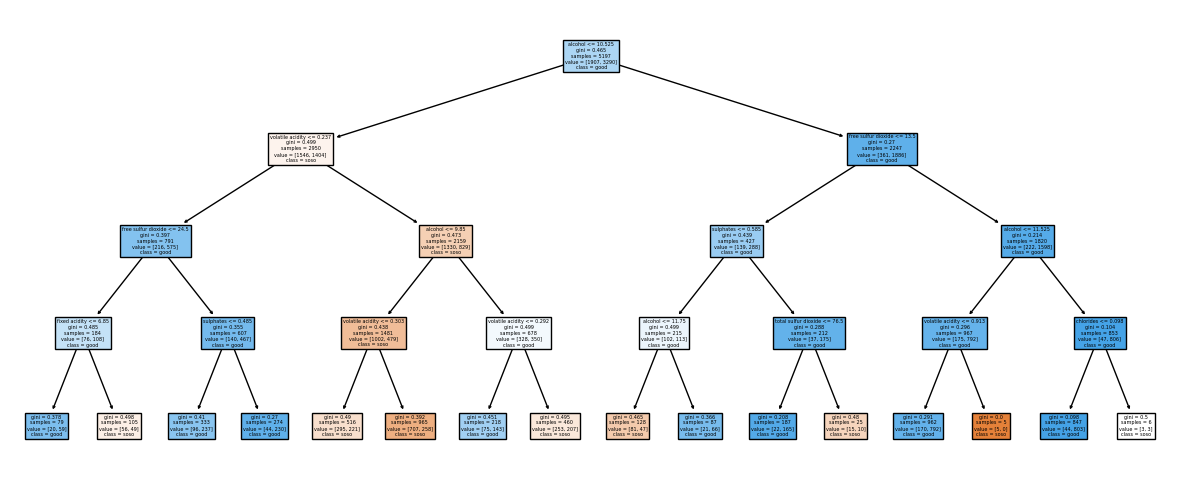

In [75]:
fig = plt.figure(figsize=(15, 6))
_  = tree.plot_tree(wine_tree,
                    feature_names=list(train_data.columns),
                    class_names=["soso", "good"],
                    filled=True)